In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
lck_data = pd.read_csv('../Data/LCK_Tournament.csv')

In [12]:
# 1. Xử lý cột date để chỉ lấy ngày/tháng/năm
lck_data['date'] = pd.to_datetime(lck_data['date']).dt.date

# 2. Nhóm dữ liệu theo ngày và game_id để tìm các cặp đội đấu với nhau
matches = lck_data.groupby(['date', 'gameid']).agg({
    'teamname': lambda x: list(set(x))  # Lấy danh sách các đội unique trong mỗi game
}).reset_index()

# 3. Lọc ra các game có đúng 2 đội (để đảm bảo)
valid_matches = matches[matches['teamname'].apply(len) == 2]

# 4. Tạo match_id cho mỗi cặp đấu
valid_matches['match_id'] = valid_matches.apply(
    lambda row: f"{row['date']}_{sorted(row['teamname'])[0]}_vs_{sorted(row['teamname'])[1]}", 
    axis=1
)

# 5. Merge match_id trở lại dataframe gốc
match_mapping = valid_matches[['date', 'gameid', 'match_id']]
lck_data = lck_data.merge(match_mapping, on=['date', 'gameid'], how='left')


In [11]:
lck_data.to_csv('../Data/LCK_data(with matchid).csv')

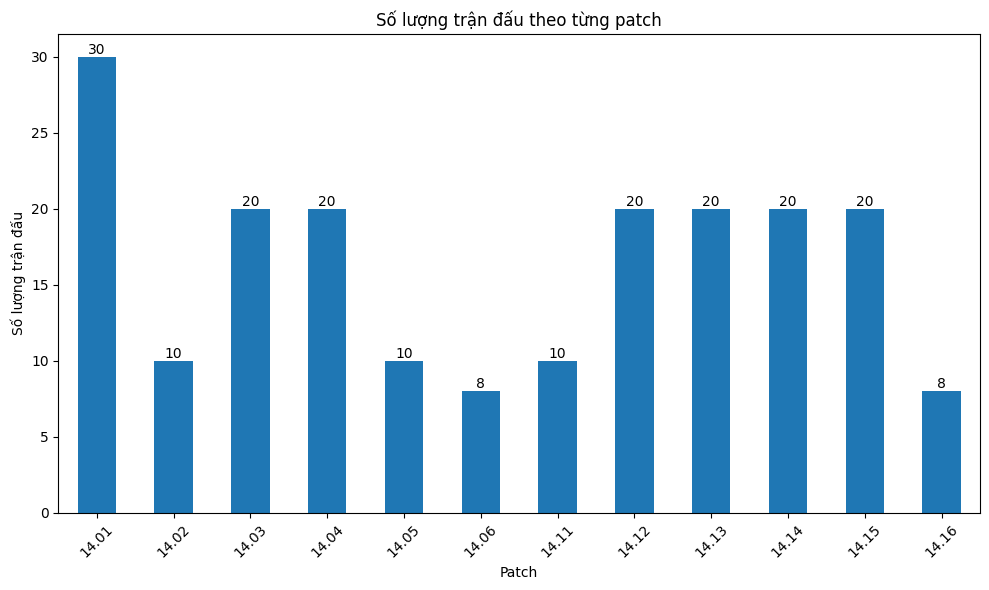

In [9]:
# Thống kê số lượng trận đấu matchid theo từng patch
matchid_per_patch = lck_data.groupby('patch')['match_id'].nunique()

# Trực quan hóa bằng biểu đồ cột
plt.figure(figsize=(10, 6))
ax = matchid_per_patch.plot(kind='bar')

# Thêm giá trị cụ thể lên mỗi cột
for i, v in enumerate(matchid_per_patch):
    ax.text(i, v, str(v), ha='center', va='bottom')
    
plt.title('Số lượng trận đấu theo từng patch')
plt.xlabel('Patch')
plt.ylabel('Số lượng trận đấu')
plt.xticks(rotation=45)
plt.tight_layout()  # Điều chỉnh layout để không bị cắt nhãn
plt.show()



